<a href="https://colab.research.google.com/github/ipgub/TIF456/blob/main/nb/2025_CV_W04Std.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

# Additional library
import urllib.request

Reading images

In [ ]:
# Images library
imgurl00 = 'https://i.ibb.co/KX1kr37/5-3-01.png'        # male - Grayscale
imgurl01 = 'https://i.ibb.co/FXYXVhb/4-1-01.png'        # female - RGB
imgurl02 = 'https://i.ibb.co/gRSp54R/pepperlut.jpg'     # underexposed img of pepper - Grayscale
imgurl03 = 'https://i.ibb.co/K0mPdBP/pepper.jpg'        # overexposed img of pepper - RGB
imgurl04 = 'https://i.ibb.co/KVSdcwL/lena-dark.png'     # Lena dark (underexposed) version - Grayscale
imgurl05 = 'https://i.ibb.co/hBpSQRx/scenery-flat.jpg'  # Scenery (unequalized) version - RGB

imglib = [
  imgurl00,
  imgurl01,
  imgurl02,
  imgurl03,
  imgurl04,
  imgurl05,
]

In [ ]:
requests = [urllib.request.urlopen(p) for p in imglib]
arrimgdata = [np.asarray(bytearray(req.read()), dtype = np.uint8) for req in requests]
testImg = [cv2.imdecode(arr,-1) for arr in arrimgdata]
for img in testImg:
  if img is None:
    print('Could not open image file')
    sys.exit()

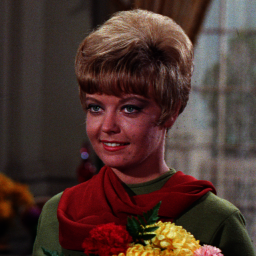

In [ ]:
cv2_imshow(testImg[1])

In [ ]:
# Designated image for current simulation
myImage = testImg[1]
myImage.shape

(256, 256, 4)

In [ ]:
if (len(myImage.shape) > 2):
  myImgGray = cv2.cvtColor(myImage,cv2.COLOR_BGR2GRAY)
else:
  myImgGray = myImage


In [ ]:
# Pick color image for simulation
myImgCol = testImg[1]
myImgCol.shape

(256, 256, 4)

## Histogram

### Grayscale image

In [ ]:
myHist = cv2.calcHist([myImgGray], [0], None, [256], [0, 256])

Histogram


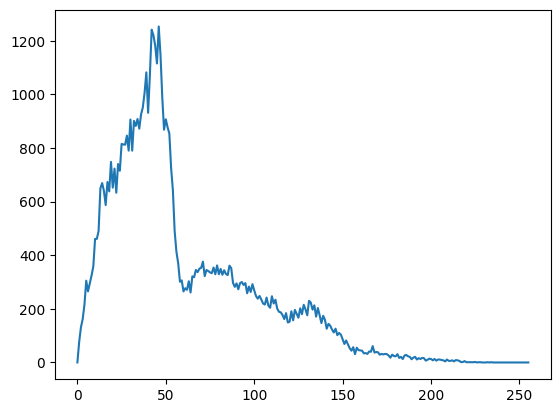

In [ ]:
plt.plot(myHist)
print('Histogram')

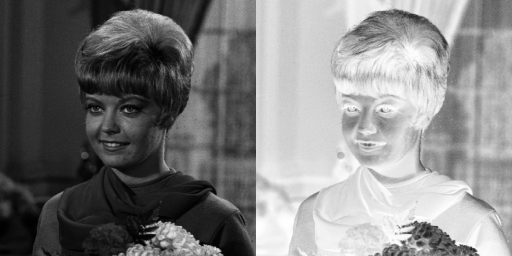

In [ ]:
ImgHeight = myImgGray.shape[0]
ImgWidth = myImgGray.shape[1]

# Create empty image first
invImg = 0 * np.ones((ImgHeight,ImgWidth), np.uint8)  # can also used np.zeros

# Negative image
for row in range(ImgHeight):
  for col in range(ImgWidth):
    invImg[row,col] = 255 - myImgGray[row,col]

cv2_imshow(np.hstack((myImgGray,invImg)))

Histogram: negative image


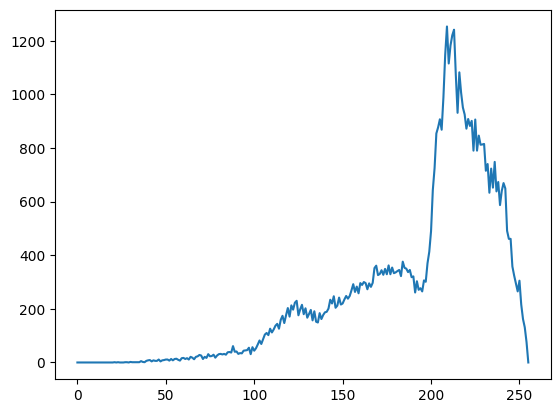

In [ ]:
plt.plot(cv2.calcHist([invImg], [0], None, [256], [0, 256]))
print('Histogram: negative image')

In [ ]:
# Function to show histogram of any images (color, grayscale)
def my_showhist(image):
  # First, check the dimension of the image to identify if the image is color image or monochrome
  if len(image.shape) > 2:
    # Color image
    no_of_channel = 3
    ch_color = ['b','g','r']
    for channel in range(no_of_channel):
      colHist = cv2.calcHist([image], [channel], None, [256], [0, 256])
      plt.plot(colHist, color = ch_color[channel])
  else:
    # Grayscale / monochrome image
      grayHist = cv2.calcHist([image], [0], None, [256], [0, 256])
      plt.plot(grayHist)

### Color Image

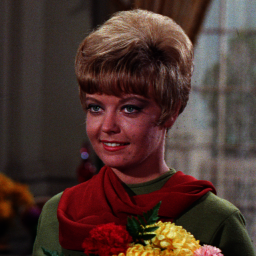

In [ ]:
cv2_imshow(myImgCol[:,:,:])

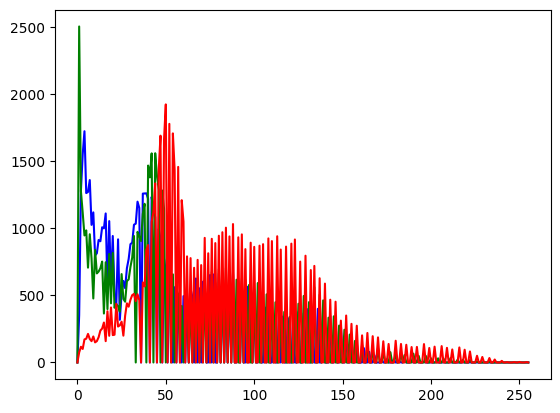

In [ ]:
# Number of channel on image
no_of_channel = 3
ch_color = ['b', 'g', 'r']
for channel in range(no_of_channel):
  colHist = cv2.calcHist([myImgCol], [channel], None, [256], [0, 256])
  plt.plot(colHist, color = ch_color[channel])

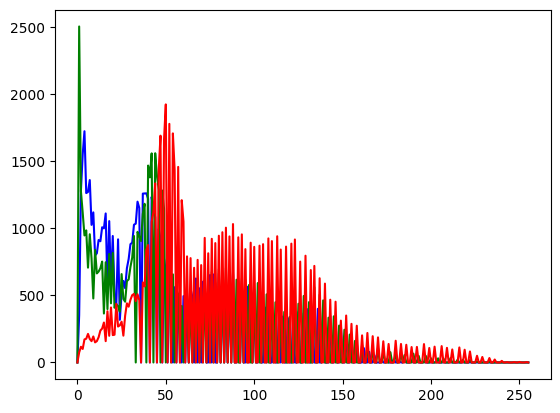

In [ ]:
my_showhist(myImgCol)

## Contrast stretching

In [ ]:
def my_contrast_stretch(pixval):
  # Contrast stretching - piecewise linear, "continuous" point function
  a1 = 40
  a2 = 128
  alpha_1 = 2.5
  alpha_2 = 1.2
  alpha_3 = 1
  if (pixval < a1) :
    newval = pixval * alpha_1
  elif (pixval < a2) :
    newval = alpha_1 * a1 + alpha_2 * (pixval - a1)
  else:
    newval = alpha_3 * (pixval-a2) + alpha_2 * (a2-a1) + a1 * alpha_1

  if newval > 255:
    newval = 255
  return round(newval)


### Grayscale image

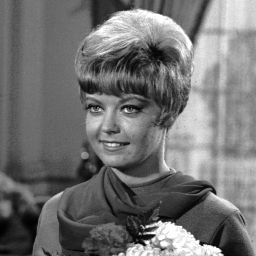

Histogram: contrast stretched image


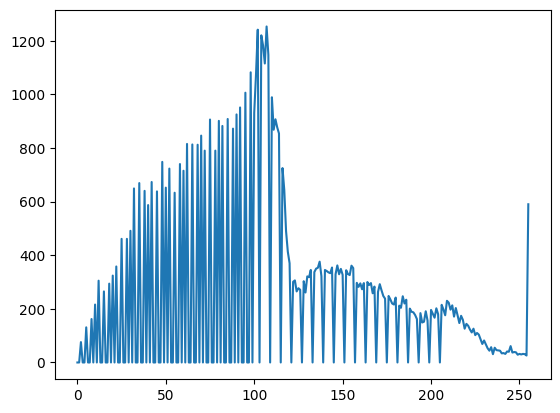

In [ ]:
# Contrast stretch

# Create empty image first
ctrImg = 0 * np.ones((ImgHeight,ImgWidth), np.uint8)  # can also used np.zeros

# Copy the input image first
for row in range(ImgHeight):
  for col in range(ImgWidth):
    ctrImg[row,col] = my_contrast_stretch(myImgGray[row,col])

cv2_imshow(ctrImg)

plt.plot(cv2.calcHist([ctrImg], [0], None, [256], [0, 256]))
print('Histogram: contrast stretched image')

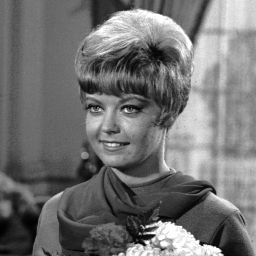

Histogram: contrast stretched image


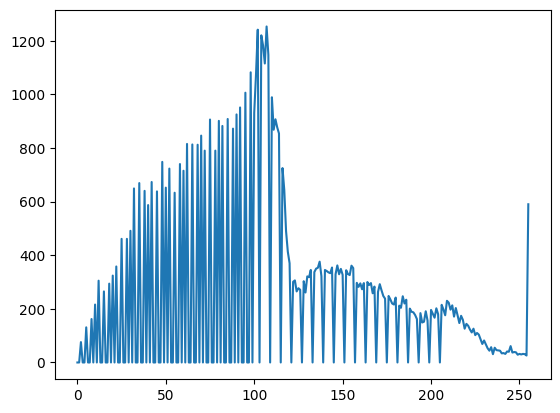

In [ ]:
# Contrast stretch - alternative version using list processing

# flatten image array into 1D list
img_list = list(myImgGray.flatten())

# transform pixel values to stretch according to piecewise linear point function
stretch_img_list = [my_contrast_stretch(p) for p in img_list]

# reshape and write back into img_array
stretch_img_array = np.reshape(np.asarray(stretch_img_list), myImgGray.shape)

cv2_imshow(stretch_img_array)

plt.plot(cv2.calcHist([ctrImg], [0], None, [256], [0, 256]))
print('Histogram: contrast stretched image')

### Color Image

Contrast streching applied to general RGB image by processing each channel.

In [ ]:
# Pick (any) color image for simulation
myImgCol = testImg[1]

In [ ]:
# Get the right dimension for the output image
ctrImgColHeight = myImgCol.shape[0]
ctrImgColWidth = myImgCol.shape[1]
if (len(myImgCol.shape) > 2):
  ctrImgColChannel = myImgCol.shape[2]
  ctrImgColDim = (ctrImgColHeight, ctrImgColWidth, ctrImgColChannel)
else:
  ctrImgColChannel = 1
  ctrImgColDim = (ctrImgColHeight, ctrImgColWidth)

# Create empty image first with the same dimension and color space with the original image
ctrImgCol = 0 * np.ones(ctrImgColDim, np.uint8)  # can also used np.zeros

# Process each channel
for row in range(ctrImgColHeight):
  for col in range(ctrImgColWidth):
    if len(ctrImgColDim) > 2:
      for channel in range(ctrImgColChannel):
        ctrImgCol [row,col,channel] = my_contrast_stretch(myImgCol[row,col,channel])
    else:
      ctrImgCol [row,col] = my_contrast_stretch(myImgCol[row,col])


Comparison: original (left), contrast stretched (right)


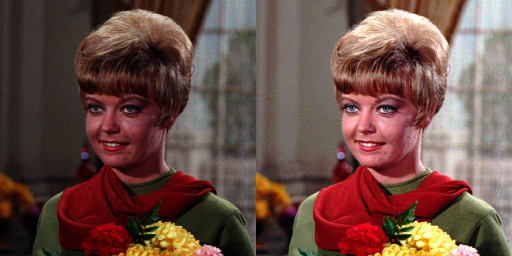

In [ ]:
print('Comparison: original (left), contrast stretched (right)')
cv2_imshow(np.hstack((myImgCol,ctrImgCol)))

ctrImgColByBGR = np.copy(ctrImgCol)  # copy for further comparison

Histogram: original image


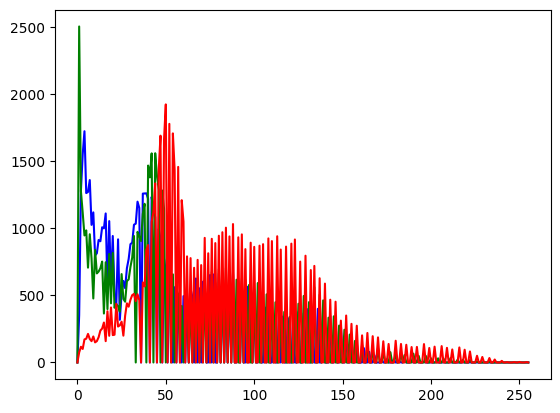

In [ ]:
# Show histogram
my_showhist(myImgCol)
print('Histogram: original image')

Histogram: contrast stretched


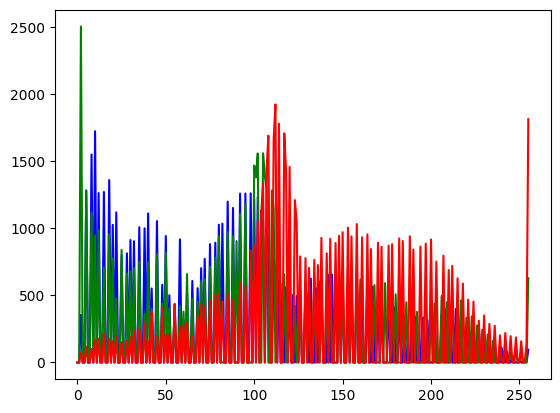

In [ ]:
# Show histogram
my_showhist(ctrImgCol)
print('Histogram: contrast stretched')

Alternative way to apply contrast stretching algorithm for color image

In [ ]:
# Pick (any) color image for simulation
myImgCol = testImg[1]

In [ ]:
# Copy the image onto another for further processing
ctrImgCol = np.copy(myImgCol)

In [ ]:
for row in range(ctrImgCol.shape[0]):
  for col in range(ctrImgCol.shape[1]):
    if (len(ctrImgCol.shape) > 2):
      for channel in range(myImgCol.shape[2]):
        ctrImgCol [row,col,channel] = my_contrast_stretch(ctrImgCol[row,col,channel])
    else:
      ctrImgCol [row,col] = my_contrast_stretch(ctrImgCol[row,col])

Comparison: original (left), processed: contrast stretched (right)


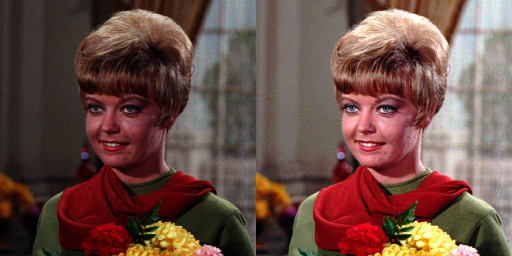

In [ ]:
print('Comparison: original (left), processed: contrast stretched (right)')
cv2_imshow(np.hstack((myImgCol,ctrImgCol)))

Contrast streching applied to general color image by using LAB color space.

In [ ]:
# Pick/select the color image
myImgCol = testImg[1]

# Copy the image onto another for further processing
ctrImgCol = np.copy(myImgCol)

In [ ]:
# Convert to LAB color space
ctrImgColLAB = cv2.cvtColor(ctrImgCol, cv2.COLOR_BGR2LAB)

In [ ]:
# Split the channel
LABChannel = cv2.split(ctrImgColLAB)

# Perform the contrast stretch to the luminance channel ('L')
for row in range(ctrImgCol.shape[0]):
  for col in range(ctrImgCol.shape[1]):
    LABChannel[0][row,col] = my_contrast_stretch(LABChannel[0][row,col])

In [ ]:
# Merge back the luminance channel with color information into LAB color image
ctrImgColLAB = cv2.merge(LABChannel)
# Convert back to BGR image
ctrImgCol = cv2.cvtColor(ctrImgColLAB, cv2.COLOR_LAB2BGR)

Comparison: original (left), processed: contrast stretched (right)


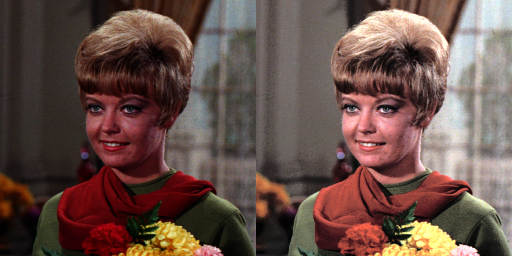

In [ ]:
print('Comparison: original (left), processed: contrast stretched (right)')
if (myImgCol.shape[2] > 3):
  cv2_imshow(np.hstack((myImgCol[:,:,:3],ctrImgCol[:,:,:3])))
else:
  cv2_imshow(np.hstack((myImgCol,ctrImgCol)))

# For further comparison
ctrImgColByLAB = np.copy(ctrImgCol)


Comparison: contrast stretch through RGB (left), contrast stretched through LAB (right)


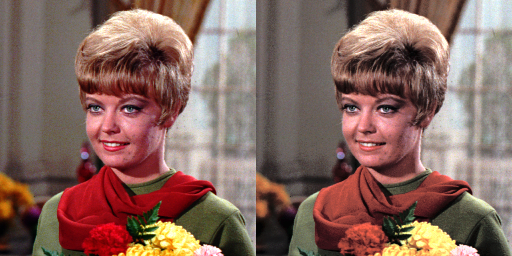

In [ ]:
print('Comparison: contrast stretch through RGB (left), contrast stretched through LAB (right)')

if (ctrImgColByBGR.shape[2] > 3) or (ctrImgColByLAB.shape[2] > 3):
  cv2_imshow(np.hstack((ctrImgColByBGR[:,:,:3],ctrImgColByLAB[:,:,:3])))
else:
  cv2_imshow(np.hstack((ctrImgColByBGR,ctrImgColByLAB)))


## Thresholding

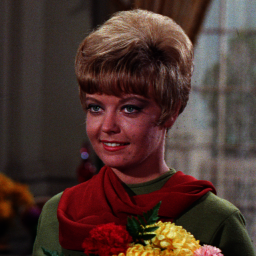

In [ ]:
# Pick/select any color image
myImgCol = testImg[1]
cv2_imshow(myImgCol)


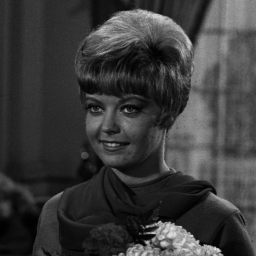

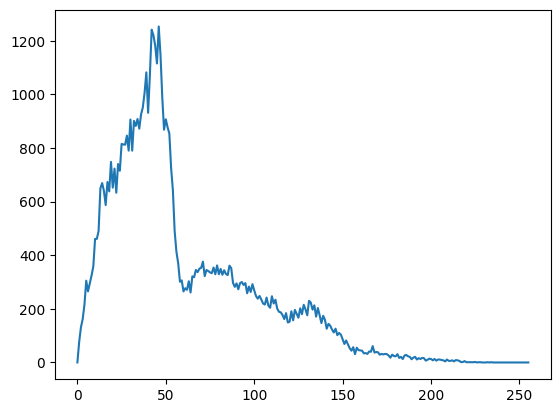

In [ ]:
# Convert to grayscale
myImgGray = cv2.cvtColor(myImgCol,cv2.COLOR_BGR2GRAY)
plt.plot(cv2.calcHist([myImgGray], [0], None, [256], [0, 256]))
cv2_imshow(myImgGray)

In [ ]:
ret, imgThr01 = cv2.threshold(myImgGray, 128, 255, cv2.THRESH_BINARY_INV)
ret, imgThr02 = cv2.threshold(myImgGray, 50, 255, cv2.THRESH_BINARY)

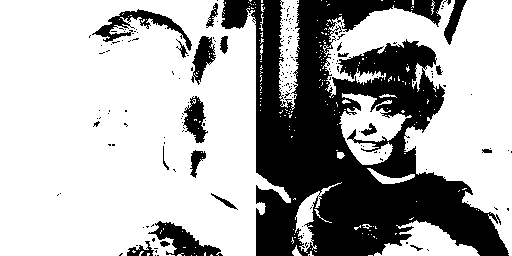

In [ ]:
cv2_imshow(np.hstack((imgThr01,imgThr02)))

In [ ]:
imgThr03 = cv2.bitwise_and(imgThr01,imgThr02)

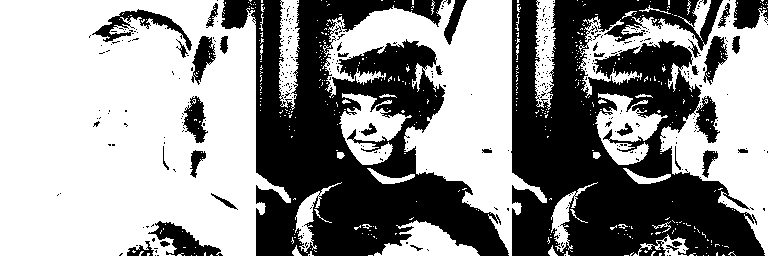

In [ ]:
cv2_imshow(np.hstack((imgThr01,imgThr02,imgThr03)))

In [ ]:
imgThr04 = cv2.bitwise_and(myImgGray,imgThr03)

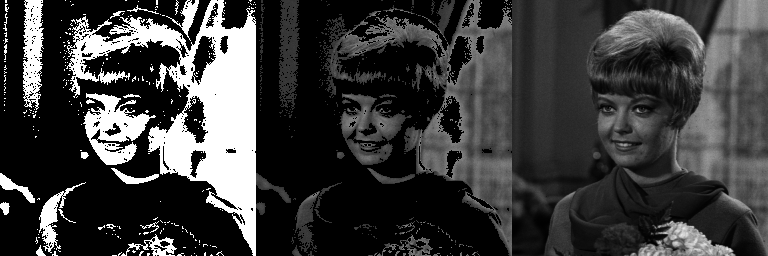

In [ ]:
cv2_imshow(np.hstack((imgThr03,imgThr04,myImgGray)))

(0.0, 1000.0)

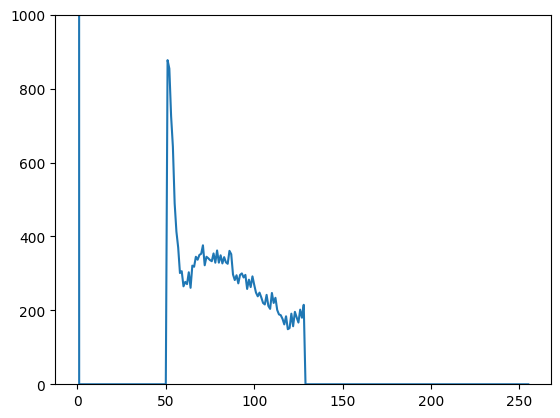

In [ ]:
plt.plot(cv2.calcHist([imgThr04], [0], None, [256], [0, 256]))
plt.ylim((0,1000))

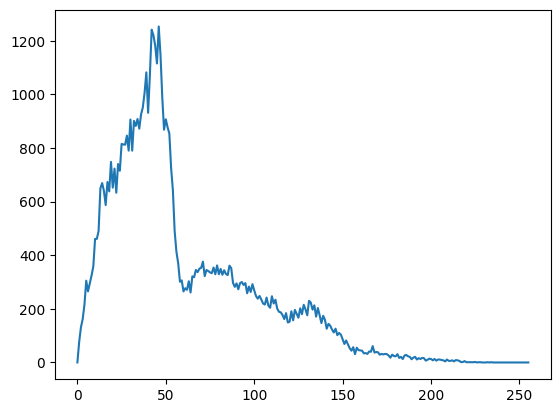

In [ ]:
plt.plot(cv2.calcHist([myImgGray], [0], None, [256], [0, 256]))
